In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing


# Data Preparation

In [41]:
df = pd.read_csv("Bank Customer Churn Prediction.csv")
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [43]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Data Cleaning
- Null values
- Duplicates
- Wrong values
- Wrong format
 

In [44]:
# Checking for null values

df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [45]:
# Checking for duplicates

df.duplicated().sum()

0

In [46]:
# Changing data format to categorical data

df["gender"] = df["gender"].astype('category')

In [47]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
credit_score,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
products_number,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
credit_card,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
active_member,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
churn,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


Data is clean
No correlation

# Machine Learning

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customer_id       10000 non-null  int64   
 1   credit_score      10000 non-null  int64   
 2   country           10000 non-null  object  
 3   gender            10000 non-null  category
 4   age               10000 non-null  int64   
 5   tenure            10000 non-null  int64   
 6   balance           10000 non-null  float64 
 7   products_number   10000 non-null  int64   
 8   credit_card       10000 non-null  int64   
 9   active_member     10000 non-null  int64   
 10  estimated_salary  10000 non-null  float64 
 11  churn             10000 non-null  int64   
dtypes: category(1), float64(2), int64(8), object(1)
memory usage: 869.4+ KB


In [50]:
df.churn.unique()
df.churn.value_counts()

0    7963
1    2037
Name: churn, dtype: int64

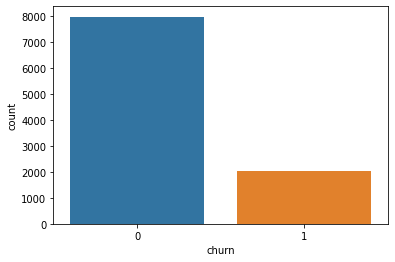

In [51]:
sns.countplot(x="churn", data=df)
plt.show()

In [52]:
churn = len(df[df["churn"] == 1])
no_churn = len(df[df["churn"] == 0])
perc_churn = (churn*100)/len(df)
perc_nochurn = (no_churn*100)/len(df)
print(f"percentage of churn: {perc_churn:.1f}")
print(f"percentage of no churn: {perc_nochurn:.1f}")

percentage of churn: 20.4
percentage of no churn: 79.6


Encoding categorical data

In [53]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
onehotarray = encoder.fit_transform(df[["gender"]]).toarray()
items = [f'{"gender"}_{item}' for item in encoder.categories_[0]]
df[items] = onehotarray

In [54]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,gender_Female,gender_Male
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1.0,0.0
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1.0,0.0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1.0,0.0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0.0,1.0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0.0,1.0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1.0,0.0
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0


Test p-value for significance

In [55]:
from scipy import stats

corr_df = pd.DataFrame(columns=['r', 'P-value'])

for col in df:
    if pd.api.types.is_numeric_dtype(df[col]):
        r , p = stats.pearsonr(df.churn, df[col])
        corr_df.loc[col] = [round(r, 4), round(p, 4)]
    
corr_df

,r,P-value
customer_id,-0.0062,0.5322
credit_score,-0.0271,0.0067
age,0.2853,0.0000
tenure,-0.0140,0.1615
balance,0.1185,0.0000
products_number,-0.0478,0.0000
credit_card,-0.0071,0.4754
active_member,-0.1561,0.0000
estimated_salary,0.0121,0.2264
churn,1.0000,0.0000


Drop statistically insignificant columns i.e. customer_id, tenure, credit_card, estimated_salary

In [56]:
y = df.churn.values
x_data = df.drop(['customer_id','gender','country','churn','tenure','credit_card','estimated_salary'], axis='columns') 

In [57]:
x_data

,credit_score,age,balance,products_number,active_member,gender_Female,gender_Male
0,619,42,0.00,1,1,1.0,0.0
1,608,41,83807.86,1,1,1.0,0.0
2,502,42,159660.80,3,0,1.0,0.0
3,699,39,0.00,2,0,1.0,0.0
4,850,43,125510.82,1,1,1.0,0.0
...,...,...,...,...,...,...,...
9995,771,39,0.00,2,0,0.0,1.0
9996,516,35,57369.61,1,1,0.0,1.0
9997,709,36,0.00,1,1,1.0,0.0
9998,772,42,75075.31,2,0,0.0,1.0


Normalization 

In [77]:
#Normalization to handle unbalanced features 
x = (x_data - x_data.min())/(x_data.max() - x_data.min()).values
x.describe()

,credit_score,age,balance,products_number,active_member,gender_Female,gender_Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.601058,0.282727,0.304848,0.176733,0.515100,0.454300,0.545700
std,0.193307,0.141727,0.248696,0.193885,0.499797,0.497932,0.497932
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.468000,0.189189,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.604000,0.256757,0.387402,0.000000,1.000000,0.000000,1.000000
75%,0.736000,0.351351,0.508749,0.333333,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Split data

In [79]:
# Split the data into training and test set. We use 20% test data with a random state of 0 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=0)

# Logistic Regression Model

Train Model

In [60]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=5251).fit(x_train, y_train)


Get results

In [80]:
# Attributes of the model
lr_score = model.score(x_test,y_test)
y_pred1 = model.predict(x_test)
print(f"Test accuracy: {lr_score}")
print(f"intercept: {model.intercept_}")     #value of y when x = 0
print(f"slope: {model.coef_}")              #gradient of slope

Test accuracy: 0.8085
intercept: [-2.60013172]
slope: [[-0.35645261  5.0346329   1.23120991 -0.06321508 -1.02111481  0.26940349
  -0.26940398]]


Predict results

In [81]:
# y_pred = model.predict(x_test)
print(f"predicted response:\n{y_pred1}\nActual response:\n{y_test}")

predicted response:
[0 0 0 ... 0 0 0]
Actual response:
[0 1 0 ... 0 0 0]


Check accuracy score alternatively

In [85]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred1)))

Model accuracy score: 0.8085


Printing and visualizing confusion matrix

In [86]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred1)
print('Confusion matrix\n\n', cm1)
print('\nTrue Positives(TP) = ', cm1[0,0])
print('\nTrue Negatives(TN) = ', cm1[1,1])
print('\nFalse Positives(FP) = ', cm1[0,1])
print('\nFalse Negatives(FN) = ', cm1[1,0])

Confusion matrix

 [[1549   46]
 [ 337   68]]

True Positives(TP) =  1549

True Negatives(TN) =  68

False Positives(FP) =  46

False Negatives(FN) =  337


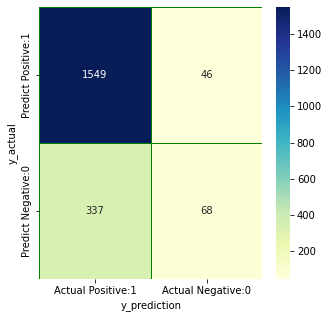

In [87]:
# heatmap visulization of confusion matrix
cm_matrix = pd.DataFrame(data=cm1, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
f, ax = plt.subplots(figsize =(5, 5))
sns.heatmap(cm_matrix, annot=True, linewidth=1, linecolor="green", fmt=".0f", cmap='YlGnBu', ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()    

# KNN Classification Approach

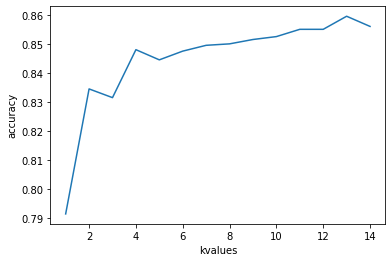

In [88]:
from sklearn.neighbors import KNeighborsClassifier

# testing differnt vaues of k with accuracy to determine the most favorable
# k ranges from 1-15
score_list = []
for i in range(1, 15):
    knn_test = KNeighborsClassifier(n_neighbors = i)
    knn_test.fit(x_train, y_train)
    score_list.append(knn_test.score(x_test, y_test))
    
plt.plot(range(1, 15), score_list)
plt.xlabel("kvalues")
plt.ylabel("accuracy")
plt.show()

In [89]:
#K = 13 has the hightst prediction accuracy
k= 13
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)
y_pred2 = knn.predict(x_test)
print("{} nn score: {}".format(k, knn.score(x_test, y_test)))

knn_score = knn.score(x_test, y_test)

13 nn score: 0.8595


In [90]:
# Alternatively
from sklearn.metrics import accuracy_score
print('KNN Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred2)))

KNN Model accuracy score: 0.8595


Printing and visualizing confusion matrix 

In [91]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred2)
print('Confusion matrix\n\n', cm2)
print('\nTrue Positives(TP) = ', cm2[0,0])
print('\nTrue Negatives(TN) = ', cm2[1,1])
print('\nFalse Positives(FP) = ', cm2[0,1])
print('\nFalse Negatives(FN) = ', cm2[1,0])

Confusion matrix

 [[1536   59]
 [ 222  183]]

True Positives(TP) =  1536

True Negatives(TN) =  183

False Positives(FP) =  59

False Negatives(FN) =  222


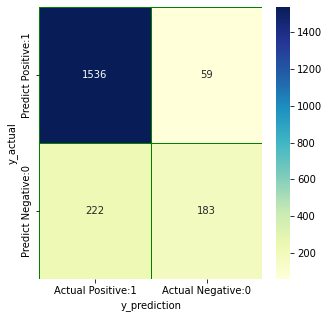

In [92]:
# Heatmap visualization of conusion matrix
cm_matrix = pd.DataFrame(data=cm2, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
f, ax = plt.subplots(figsize =(5, 5))
sns.heatmap(cm_matrix, annot=True, linewidth=1, linecolor="green", fmt=".0f", cmap='YlGnBu', ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()  

# Decision Tree Approach

In [93]:
# Decision tree approach
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 50)
dt.fit(x_train, y_train)
dt_score = dt.score(x_test, y_test)
y_pred3 = dt.predict(x_test)

print("score: ", dt.score(x_test, y_test))
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred3)))

score:  0.7925
Model accuracy score: 0.7925


Printing and visualizing the confusion matrix

In [94]:
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_test, y_pred3)
print('Confusion matrix\n\n', cm3)
print('\nTrue Positives(TP) = ', cm3[0,0])
print('\nTrue Negatives(TN) = ', cm3[1,1])
print('\nFalse Positives(FP) = ', cm3[0,1])
print('\nFalse Negatives(FN) = ', cm3[1,0])

Confusion matrix

 [[1371  224]
 [ 191  214]]

True Positives(TP) =  1371

True Negatives(TN) =  214

False Positives(FP) =  224

False Negatives(FN) =  191


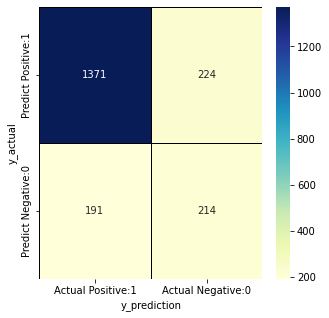

In [95]:
# Visualizing the confusion matrix
f, ax = plt.subplots(figsize = (5, 5))
cm_matrix = pd.DataFrame(data=cm3, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, linewidths=1, linecolor="black",fmt='d', cmap='YlGnBu', ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

# Random Forest Classification

In [96]:
from sklearn.ensemble import RandomForestClassifier
# set n_estimators to 100 whcih means the model will use 100 subsets
rf = RandomForestClassifier(n_estimators = 100, random_state = 30)
rf.fit(x_train, y_train)
rf_score= rf.score(x_test, y_test)
y_pred4 = rf.predict(x_test)
print("random forest model score: ", rf_score)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred4)))

random forest model score:  0.843
Model accuracy score: 0.8430


Printing and visualizing the confusion matrix

In [97]:
from sklearn.metrics import confusion_matrix
cm4 = confusion_matrix(y_test, y_pred4)
print('Confusion matrix\n\n', cm4)
print('\nTrue Positives(TP) = ', cm4[0,0])
print('\nTrue Negatives(TN) = ', cm4[1,1])
print('\nFalse Positives(FP) = ', cm4[0,1])
print('\nFalse Negatives(FN) = ', cm4[1,0])

Confusion matrix

 [[1486  109]
 [ 205  200]]

True Positives(TP) =  1486

True Negatives(TN) =  200

False Positives(FP) =  109

False Negatives(FN) =  205


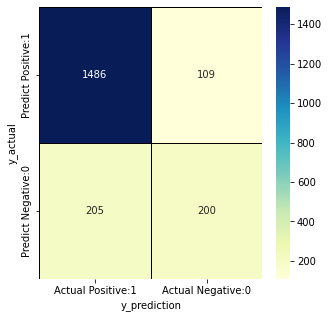

In [98]:
# confusion matrix
f, ax = plt.subplots(figsize = (5, 5))
cm_matrix = pd.DataFrame(data=cm4, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, linewidths=1, linecolor="black",fmt='d', cmap='YlGnBu', ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

In [99]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1595
           1       0.65      0.49      0.56       405

    accuracy                           0.84      2000
   macro avg       0.76      0.71      0.73      2000
weighted avg       0.83      0.84      0.83      2000



# Support Vector Machines

In [101]:
# SVM approach
from sklearn.svm import SVC
svm = SVC(random_state = 42)
svm.fit(x_train, y_train)
print("Accuracy of SVM: ", svm.score(x_test, y_test))
svm_score = svm.score(x_test, y_test)
y_pred5 = svm.predict(x_test)

Accuracy of SVM:  0.8615


In [102]:
from sklearn.metrics import confusion_matrix
cm5 = confusion_matrix(y_test, y_pred5)
print('Confusion matrix\n\n', cm5)
print('\nTrue Positives(TP) = ', cm5[0,0])
print('\nTrue Negatives(TN) = ', cm5[1,1])
print('\nFalse Positives(FP) = ', cm5[0,1])
print('\nFalse Negatives(FN) = ', cm5[1,0])

Confusion matrix

 [[1570   25]
 [ 252  153]]

True Positives(TP) =  1570

True Negatives(TN) =  153

False Positives(FP) =  25

False Negatives(FN) =  252


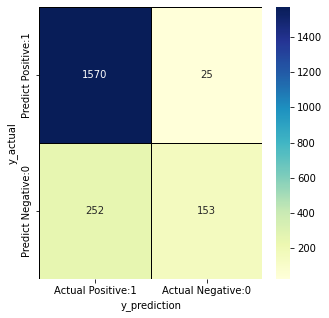

In [103]:
# Visualizing the confusion matrix
f, ax = plt.subplots(figsize = (5, 5))
cm_matrix = pd.DataFrame(data=cm5, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, linewidths=1, linecolor="black",fmt='d', cmap='YlGnBu', ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

# Naive Bayes Classification

In [107]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
print("accuracy of naive bayes: ", nb.score(x_test, y_test))
nb_score = nb.score(x_test, y_test)
y_pred6 = nb.predict(x_test)

accuracy of naive bayes:  0.8335


Visualizing and printing confusion matrix

In [108]:
from sklearn.metrics import confusion_matrix
cm6 = confusion_matrix(y_test, y_pred6)
print('Confusion matrix\n\n', cm6)
print('\nTrue Positives(TP) = ', cm6[0,0])
print('\nTrue Negatives(TN) = ', cm6[1,1])
print('\nFalse Positives(FP) = ', cm6[0,1])
print('\nFalse Negatives(FN) = ', cm6[1,0])

Confusion matrix

 [[1549   46]
 [ 287  118]]

True Positives(TP) =  1549

True Negatives(TN) =  118

False Positives(FP) =  46

False Negatives(FN) =  287


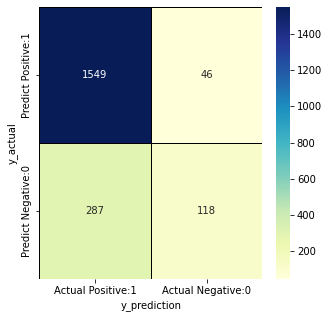

In [109]:
# Visualizing the confusion matrix
f, ax = plt.subplots(figsize = (5, 5))
cm_matrix = pd.DataFrame(data=cm6, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, linewidths=1, linecolor="black",fmt='d', cmap='YlGnBu', ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

# Compare Classification Models

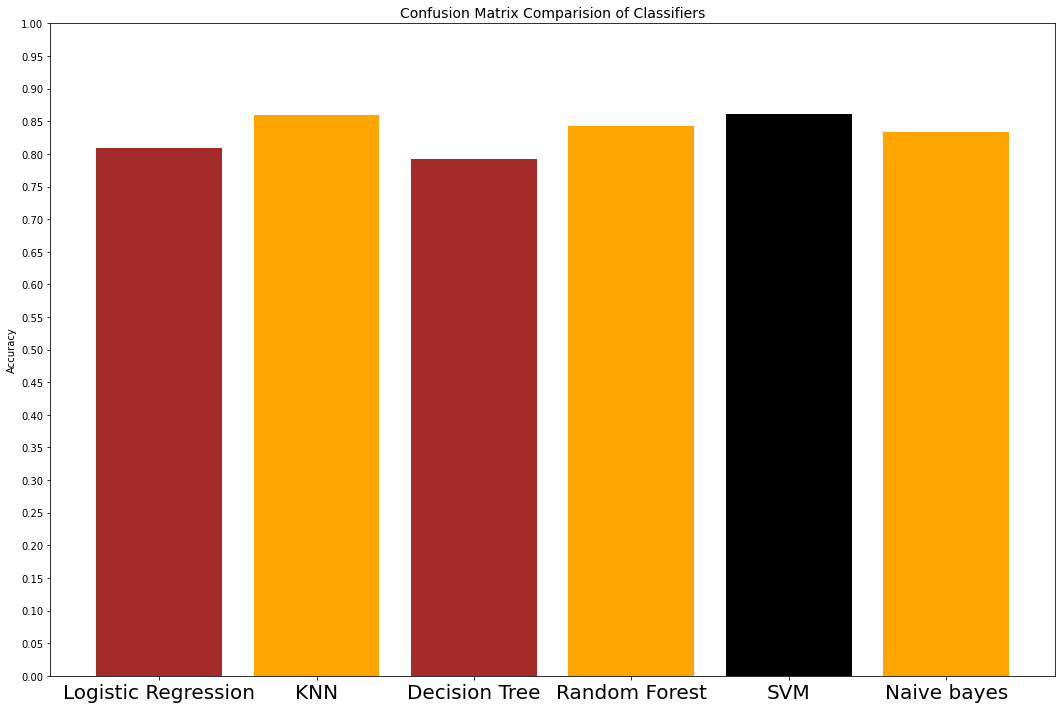

In [114]:
class_name = ("Logistic Regression", "KNN", "Decision Tree", "Random Forest", "SVM", "Naive bayes")
class_score = (lr_score, knn_score, dt_score, rf_score, svm_score, nb_score)
y_pos = np.arange(len(class_score))
colors = ("brown", "orange", "brown","orange", "black","orange")
plt.figure(figsize=(18, 12))
plt.bar(y_pos, class_score, color=colors)
plt.xticks(y_pos, class_name, fontsize=20)
plt.yticks(np.arange(0.00, 1.05, step = 0.05))
plt.ylabel("Accuracy")

plt.title("Confusion Matrix Comparision of Classifiers", fontsize=14)
# plt.savefig("graph.png")
plt.show()

In [115]:
print(class_score)

(0.8085, 0.8595, 0.7925, 0.843, 0.8615, 0.8335)
